In [43]:
import pandas as pd
import numpy as np # linear algebra

import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('data/katalog_gempa.csv')
df.head()


,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.count()

tgl        92887
ot         92887
lat        92887
lon        92887
depth      92887
mag        92887
remark     92887
strike1     2735
dip1        2735
rake1       2735
strike2     2735
dip2        2735
rake2       2735
dtype: int64

In [50]:
df.drop_duplicates(inplace=True)
#Delete duplicate data and if inplace value is true deleting in the same dataframe

In [51]:
df.count()

tgl        92887
ot         92887
lat        92887
lon        92887
depth      92887
mag        92887
remark     92887
strike1     2735
dip1        2735
rake1       2735
strike2     2735
dip2        2735
rake2       2735
dtype: int64

In [57]:
df.isnull().sum()

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

In [79]:
df["remark"].str.rstrip().value_counts()

remark
Minahassa Peninsula - Sulawesi        9433
Sulawesi - Indonesia                  7897
Sumbawa Region - Indonesia            7312
Java - Indonesia                      6798
Northern Sumatra - Indonesia          5941
Southern Sumatra - Indonesia          5314
Banda Sea                             5003
Northern Molucca Sea                  4984
Seram - Indonesia                     4325
Halmahera - Indonesia                 3628
Irian Jaya Region - Indonesia         3137
South of Java - Indonesia             2503
Talaud Islands - Indonesia            2427
Flores Region - Indonesia             2338
Timor Region                          1947
Flores Sea                            1879
Near North Coast of Irian Jaya        1865
Sumba Region - Indonesia              1851
Irian Jaya - Indonesia                1666
Ceram Sea                             1535
Bali Region - Indonesia               1374
Southern Molucca Sea                  1271
Sunda Strait - Indonesia              1063
Off 

In [73]:
filteredRemark_df = df[df["remark"].str.contains("Indonesia", case=False)]
filteredRemark_df
#Filtering data with remark contains Indonesia

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
5,2008/11/01,14:47:00.029,-7.37,105.31,18,3.3,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
6,2008/11/01,13:04:38.742,0.10,98.55,12,4.7,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92875,2023/01/26,03:46:10.433,-8.24,119.96,169,3.4,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92876,2023/01/26,03:33:28.683,-7.23,110.20,240,3.8,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92878,2023/01/26,02:52:41.774,-3.52,129.07,10,2.5,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
filteredRemark_df["remark"].str.strip().value_counts()
#Show data with remark contains Indonesia

remark
Sulawesi - Indonesia                 7897
Sumbawa Region - Indonesia           7312
Java - Indonesia                     6798
Northern Sumatra - Indonesia         5941
Southern Sumatra - Indonesia         5314
Seram - Indonesia                    4325
Halmahera - Indonesia                3628
Irian Jaya Region - Indonesia        3137
South of Java - Indonesia            2503
Talaud Islands - Indonesia           2427
Flores Region - Indonesia            2338
Sumba Region - Indonesia             1851
Irian Jaya - Indonesia               1666
Bali Region - Indonesia              1374
Sunda Strait - Indonesia             1063
Southwest of Sumatra - Indonesia     1037
South of Bali - Indonesia             890
South of Sumbawa - Indonesia          409
Tanimbar Islands Reg. - Indonesia     329
North of Halmahera - Indonesia        257
Aru Islands Region - Indonesia        137
Buru - Indonesia                       95
Name: count, dtype: int64

In [76]:
filteredDate_df = filteredRemark_df[filteredRemark_df["tgl"].str.contains("2023", case=False)]
filteredDate_df
#Filtering data by date

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
91712,2023/01/01,20:14:31.327,2.05,98.89,10,3.2,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
91713,2023/01/01,19:46:22.614,2.05,98.89,10,3.1,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
91715,2023/01/01,19:40:26.791,2.05,98.90,10,2.5,Northern Sumatra - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
91717,2023/01/01,19:34:55.807,-3.26,131.11,16,4.0,Irian Jaya Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
91719,2023/01/01,19:03:05.217,2.20,128.21,139,3.8,Halmahera - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92875,2023/01/26,03:46:10.433,-8.24,119.96,169,3.4,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92876,2023/01/26,03:33:28.683,-7.23,110.20,240,3.8,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92878,2023/01/26,02:52:41.774,-3.52,129.07,10,2.5,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
filteredDate_df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,607.000000,607.000000,607.000000,607.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-3.630972,115.993888,41.057661,3.360297,183.673333,63.413333,1.360000,186.739667,58.393333,23.716667
std,4.653603,12.115983,49.554866,0.929968,89.580212,18.209750,114.082395,124.501900,20.470769,99.160487
min,-10.950000,94.640000,10.000000,1.400000,83.600000,21.200000,-177.600000,1.300000,18.600000,-156.900000
25%,-7.785000,106.120000,10.000000,2.700000,123.750000,51.225000,-107.625000,59.660000,45.425000,-34.475000
50%,-3.780000,117.230000,15.000000,3.300000,154.350000,67.850000,23.600000,247.110000,57.850000,4.450000
75%,0.690000,127.210000,55.000000,4.000000,201.100000,76.550000,82.425000,288.107500,78.750000,108.575000
max,5.560000,140.650000,281.000000,7.500000,352.800000,88.400000,175.100000,353.110000,87.600000,175.900000


<Axes: xlabel='tahun'>

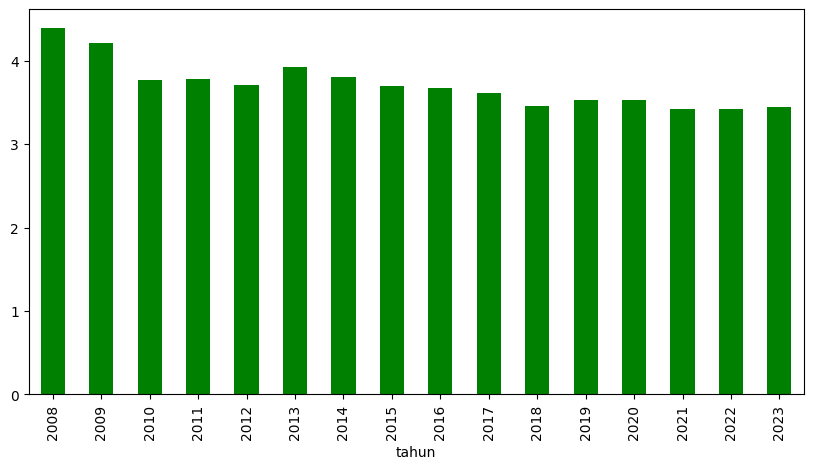

In [81]:
# Mengubah kolom "tgl" menjadi format datetime
df['tgl'] = pd.to_datetime(df['tgl'])

# Menambahkan kolom "tahun" berdasarkan data tahun dalam kolom "tgl"
df['tahun'] = df['tgl'].dt.year

# Menghitung rata-rata magnitude gempa berdasarkan tahun
rata_rata_magnitude = df.groupby('tahun')['mag'].mean()

# Menampilkan data tahun dan rata-rata magnitude gempa
rata_rata_magnitude.plot(kind='bar', figsize=(10,5), color='green')
